In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file = pd.read_csv('events.csv',low_memory=False)

In [3]:
visited = file.loc[file.event=='visited site']

In [4]:
visited['device_type'].value_counts()

Smartphone    44239
Computer      41790
Tablet         1234
Unknown         115
Name: device_type, dtype: int64

In [5]:
compras = file.loc[file.event=='conversion']

In [6]:
p = visited.groupby('person')

In [7]:
def disp (x):
    return ', '.join(sorted(x.device_type.unique()))
origen = p.apply(disp)

In [8]:
origen.value_counts()

Smartphone                      13967
Computer                        11768
Computer, Smartphone              625
Tablet                            467
Unknown                            40
Smartphone, Tablet                 11
Computer, Tablet                   11
Computer, Smartphone, Tablet        6
Computer, Unknown                   3
Smartphone, Unknown                 1
dtype: int64

In [9]:
i = origen.reset_index()

In [10]:
i.head()

,person,0
0,0004b0a2,Smartphone
1,0006a21a,Smartphone
2,000a54b2,Computer
3,00184bf9,Computer
4,0019c395,Smartphone


In [11]:
i['compro'] = i['person'].isin(compras['person'])

In [12]:
i.head()

,person,0,compro
0,0004b0a2,Smartphone,False
1,0006a21a,Smartphone,False
2,000a54b2,Computer,False
3,00184bf9,Computer,False
4,0019c395,Smartphone,False


In [13]:
c = i.groupby(0).agg({'compro':'sum'}).sort_values('compro',ascending=False)

In [14]:
c

,compro
0,
Computer,263.0
"Computer, Smartphone",193.0
Smartphone,166.0
"Smartphone, Tablet",3.0
"Computer, Tablet",2.0
Tablet,2.0
"Computer, Smartphone, Tablet",1.0
"Computer, Unknown",1.0
"Smartphone, Unknown",0.0


Text(0.5,0,'Cantidad de personas')

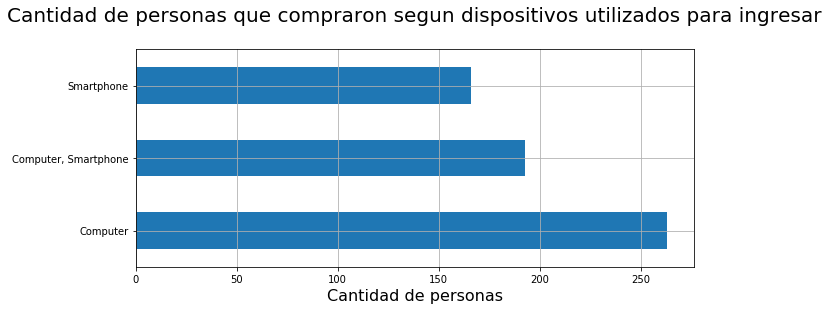

In [15]:
g = (c.head(3)).plot.barh(legend=False,figsize=(10,4))
plt.grid(True)
g.set_ylabel('')
g.set_title('Cantidad de personas que compraron segun dispositivos utilizados para ingresar\n',size=20)
g.set_xlabel('Cantidad de personas',size=16)

# Visitas segun canal

In [16]:
visited_filtered = visited.loc[visited['device_type'].isin(['Computer','Smartphone'])]
channels = visited_filtered.groupby('device_type').apply(lambda x: pd.Series(x['channel'].value_counts()))

In [17]:
channels.to_frame()

channel
device_type                  
Computer    Paid        20827
            Direct      10602
            Organic      5842
            Referral     4232
            Social        251
            Email          27
            Unknown         9
Smartphone  Paid        22581
            Direct       7754
            Referral     6928
            Organic      6349
            Social        578
            Email          49

In [18]:
forgraph = channels.to_frame().reset_index()
channels.to_frame().reset_index()

,device_type,level_1,channel
0,Computer,Paid,20827
1,Computer,Direct,10602
2,Computer,Organic,5842
3,Computer,Referral,4232
4,Computer,Social,251
5,Computer,Email,27
6,Computer,Unknown,9
7,Smartphone,Paid,22581
8,Smartphone,Direct,7754
9,Smartphone,Referral,6928


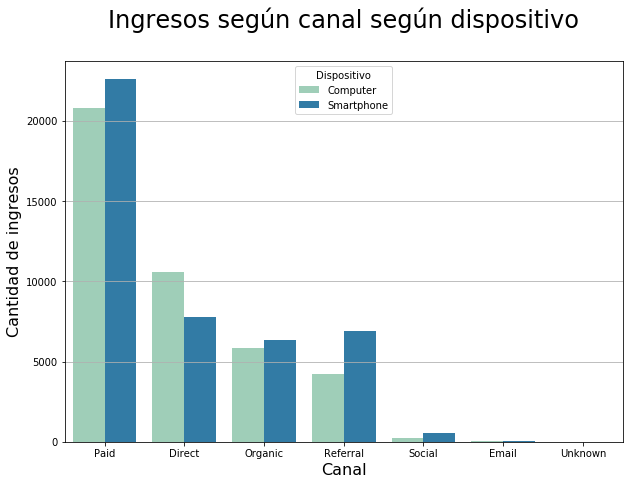

In [29]:
fig,ax=plt.subplots(figsize=(10,7))

plt.grid(True)
g = sns.barplot(ax=ax,data=forgraph,x='level_1',y='channel',palette='YlGnBu',alpha=1,hue='device_type')
g.set_title('Ingresos según canal según dispositivo\n',size=24)
g.set_xlabel('Canal',size=16)
g.set_ylabel('Cantidad de ingresos',size=16)
g.legend(title='Dispositivo')